
# Création du graphique pour représenter les abréviation selon leur première et dernière date d'apparition

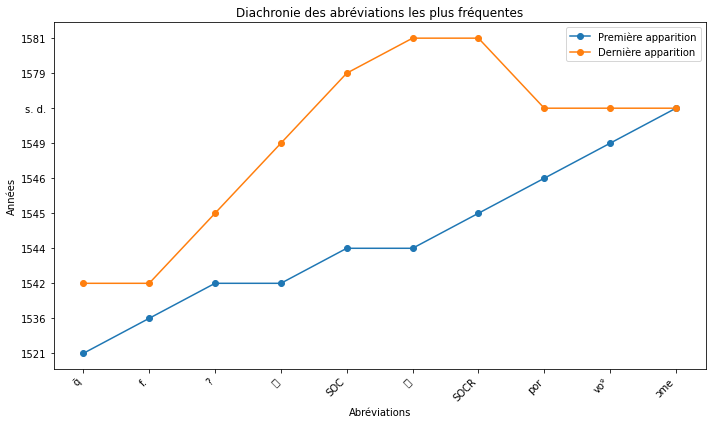

In [ ]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Ouvrir le fichier JSON
with open("resultats_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Compter la fréquence des abréviation
abreviations_freq = Counter()
abreviations_min_dates = {}
abreviations_max_dates = {}

for fichier, infos in data.items():
    abreviations = infos["abreviations"]
    date = infos["date"]

    for abreviation in abreviations:
        abreviations_freq[abreviation] += 1
        if abreviation not in abreviations_min_dates:
            abreviations_min_dates[abreviation] = date
            abreviations_max_dates[abreviation] = date
        else:
            if date < abreviations_min_dates[abreviation]:
                abreviations_min_dates[abreviation] = date
            if date > abreviations_max_dates[abreviation]:
                abreviations_max_dates[abreviation] = date

#10 abréviations les plus fréquentes
top_10_abreviations = abreviations_freq.most_common(10)
abreviations = [abreviation for abreviation, _ in top_10_abreviations]
min_years = sorted([abreviations_min_dates[abreviation] for abreviation in abreviations])
max_years = sorted([abreviations_max_dates[abreviation] for abreviation in abreviations])

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(abreviations, min_years, marker='o', linestyle='-', label='Première apparition')
plt.plot(abreviations, max_years, marker='o', linestyle='-', label='Dernière apparition')
plt.xlabel('Abréviations')
plt.ylabel('Années')
plt.title('Diachronie des abréviations les plus fréquentes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# Quantifier les 3 abréviations les plus fréquentes selon la décennie

In [48]:
import json
from collections import Counter

# Ouvrir le fichier JSON
with open("resultats_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

years = []
for infos in data.values():
    try:
        if infos["date"] != "s. d":
            years.append(int(infos["date"][:4]))
    except ValueError:
        pass

if years:
    min_year = min(years)
    max_year = max(years)
else:
    min_year = None
    max_year = None

print("Année minimale:", min_year)
print("Année maximale:", max_year)

decade_ranges = [(start, start + 9) for start in range(min_year, max_year + 1, 10)]

abbr_freq_per_decade = {decade: Counter() for decade in decade_ranges}

for fichier, infos in data.items():
    try:
        if infos["date"] != "s. d":  
            year = int(infos["date"][:4])

            # Trouver la décennie correspondante
            for start, end in decade_ranges:
                if start <= year <= end:
                    decade = (start, end)
                    break

            abbr_freq_per_decade[decade].update(infos["abreviations"])
            break
    except ValueError:
        pass

# Afficher les abréviations et leurs fréquences pour chaque décennie
for decade, abbr_freq in abbr_freq_per_decade.items():
    print(f"Décennie {decade}:")
    for abbr, freq in abbr_freq.items():
        print(f"  - {abbr}: {freq} occurrences")
    print()


Année minimale: 1521
Année maximale: 1616
Décennie (1521, 1530):

Décennie (1531, 1540):

Décennie (1541, 1550):

Décennie (1551, 1560):

Décennie (1561, 1570):

Décennie (1571, 1580):

Décennie (1581, 1590):
  - Mons.: 2 occurrences
  - Nouemb.: 1 occurrences

Décennie (1591, 1600):

Décennie (1601, 1610):

Décennie (1611, 1620):



# Trouver la similarité entre les paires d'abréviations selon le genre

In [49]:
from itertools import combinations
from collections import defaultdict

abbreviation_sets_by_type = defaultdict(list)
jaccard_similarity_results = defaultdict(dict)

for file_name, file_data in data.items():
    abreviations = file_data["abreviations"]
    type_content = file_data["type_content"]
    if type_content:
        for abbr in abreviations:
            abbreviation_sets_by_type[type_content].append((abbr, set(abreviations)))

print("Similarités entre les abréviations :")
for type_content, sets_list in abbreviation_sets_by_type.items():
    print(f"Type de contenu : {type_content}")
    for pair in combinations(range(len(sets_list)), 2):
        i, j = pair
        abbr_i, set_i = sets_list[i]
        abbr_j, set_j = sets_list[j]
        intersection = len(set_i.intersection(set_j))
        union = len(set_i.union(set_j))
        jaccard_similarity = intersection / union
        #print(f"{abbr_i}, {abbr_j} : {jaccard_similarity}")

Similarités entre les abréviations :
Type de contenu : Lettre
Type de contenu : Traite
Type de contenu : Essais
Type de contenu : Nouvelle
Type de contenu : Roman
Type de contenu : Histoire
Type de contenu : Institution
Type de contenu : Dialogue
Type de contenu : Discours
Type de contenu : Embleme
Type de contenu : discours
Type de contenu : Poesie
Type de contenu : chronique
Type de contenu : Eglogue
Type de contenu : Utopie
Type de contenu : roman
Type de contenu : Lettre_dedicatoire
Type de contenu : Reponse
Type de contenu : Pronostication
Type de contenu : poesie
Type de contenu : Ode
Type de contenu : Oeuvres
Type de contenu : Traduction
Type de contenu : Arret
Type de contenu : Recit
Type de contenu : oeuvres
Type de contenu : Elegie


## Les stocker dans des fichiers csv dans le dossier GenreSimilarité

In [ ]:
import csv
from itertools import combinations
from collections import defaultdict

abbreviation_sets_by_type = defaultdict(list)
jaccard_similarity_results = defaultdict(dict)

for file_name, file_data in data.items():
    abreviations = file_data["abreviations"]
    type_content = file_data["type_content"]
    if type_content:
        for abbr in abreviations:
            abbreviation_sets_by_type[type_content].append((abbr, set(abreviations)))
            
for type_content, sets_list in abbreviation_sets_by_type.items():
    file_name = f"GenreSimilarite/results_{type_content}.csv"  # Nom du fichier en fonction du type de contenu
    with open(file_name, 'w', newline='',encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Abbreviation1', 'Abbreviation2', 'Jaccard Similarity'])  # Écrire l'en-tête
        for pair in combinations(range(len(sets_list)), 2):
            i, j = pair
            abbr_i, set_i = sets_list[i]
            abbr_j, set_j = sets_list[j]
            intersection = len(set_i.intersection(set_j))
            union = len(set_i.union(set_j))
            jaccard_similarity = intersection / union
            writer.writerow([abbr_i, abbr_j, jaccard_similarity])

# Clusteriser les abréviations similaires (pas de résultats concluants)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from collections import defaultdict

abbreviations = []

for file_name, file_data in data.items():
    abreviations = file_data["abreviations"]
    abbreviations = set(abreviations)
print(abreviations)
# Vectorisation des abréviations
vectorizer = TfidfVectorizer(min_df=1, max_df=0.8, lowercase=True)
X = vectorizer.fit_transform(abbreviations)

# Cluster
dbscan = DBSCAN(eps=0.5, min_samples=1)
clusters = dbscan.fit_predict(X)
abbreviation_clusters = defaultdict(list)
for i, abbv in enumerate(abbreviations):
    abbreviation_clusters[clusters[i]].append(abbv)

# Afficher les groupes d'abréviations similaires
for cluster, abbrevs in abbreviation_clusters.items():
    print(f"Cluster {cluster}: {abbrevs}")


# Similarité entre abréviations indépendamment du genre

In [58]:
from itertools import combinations
from collections import Counter
similarities = {}
with open("resultats_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)
for file_name, file_data in data.items():
    abreviations = file_data["abreviations"]
    abbreviations = set(abreviations)
    # Similarités de Jaccard
    for abbr1, abbr2 in combinations(abbreviations, 2):
        set_abbr1 = set(abbr1)
        set_abbr2 = set(abbr2)
        intersection = len(set_abbr1.intersection(set_abbr2))
        union = len(set_abbr1.union(set_abbr2))
        jaccard_similarity = intersection / union
        similarities[(abbr1, abbr2)] = jaccard_similarity

    for abbr_pair, similarity in similarities.items():
        if 0.8 <= similarity <= 0.99:
            print(f"Similarité entre {abbr_pair[0]} et {abbr_pair[1]} : {similarity}")


Similarité entre Illmus et Illmum : 0.8
Similarité entre Illmus et Illmum : 0.8
Similarité entre donc?s et onc?s : 0.8333333333333334
Similarité entre donc?s et doc?s : 0.8333333333333334
Similarité entre ?sonne et ?sens : 0.8
Similarité entre ?mieres et ?mier : 0.8333333333333334
Similarité entre ?les et ?eilles : 0.8
Similarité entre ?sentemet et ?sent : 0.8333333333333334
Similarité entre ?mier et ?mieremet : 0.8333333333333334
Similarité entre ?sent et ?sens : 0.8
Similarité entre ?tie et ?ties : 0.8
Similarité entre La?lle et la?lle : 0.8
Similarité entre ?sens et ?sence : 0.8
Similarité entre Illmus et Illmum : 0.8
Similarité entre donc?s et onc?s : 0.8333333333333334
Similarité entre donc?s et doc?s : 0.8333333333333334
Similarité entre ?sonne et ?sens : 0.8
Similarité entre ?mieres et ?mier : 0.8333333333333334
Similarité entre ?les et ?eilles : 0.8
Similarité entre ?sentemet et ?sent : 0.8333333333333334
Similarité entre ?mier et ?mieremet : 0.8333333333333334
Similarité entre

In [65]:
import json
from itertools import combinations
from tabulate import tabulate

similarities = []

with open("resultats_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

for file_name, file_data in data.items():
    abreviations = file_data["abreviations"]
    abbreviations = set(abreviations)

    # Similarités de Jaccard
    for abbr1, abbr2 in combinations(abbreviations, 2):
        set_abbr1 = set(abbr1)
        set_abbr2 = set(abbr2)
        intersection = len(set_abbr1.intersection(set_abbr2))
        union = len(set_abbr1.union(set_abbr2))
        jaccard_similarity = intersection / union
        
        if 0.8 <= jaccard_similarity <= 0.99:
            similarities.append([abbr1, abbr2, jaccard_similarity])

headers = ["Abbreviation 1", "Abbreviation 2", "Similarity"]
print(tabulate(similarities[:10], headers=headers, tablefmt="fancy_grid"))


╒══════════════════╤══════════════════╤══════════════╕
│ Abbreviation 1   │ Abbreviation 2   │   Similarity │
╞══════════════════╪══════════════════╪══════════════╡
│ Illmus           │ Illmum           │     0.8      │
├──────────────────┼──────────────────┼──────────────┤
│ donc?s           │ onc?s            │     0.833333 │
├──────────────────┼──────────────────┼──────────────┤
│ donc?s           │ doc?s            │     0.833333 │
├──────────────────┼──────────────────┼──────────────┤
│ ?sonne           │ ?sens            │     0.8      │
├──────────────────┼──────────────────┼──────────────┤
│ ?mieres          │ ?mier            │     0.833333 │
├──────────────────┼──────────────────┼──────────────┤
│ ?les             │ ?eilles          │     0.8      │
├──────────────────┼──────────────────┼──────────────┤
│ ?sentemet        │ ?sent            │     0.833333 │
├──────────────────┼──────────────────┼──────────────┤
│ ?mier            │ ?mieremet        │     0.833333 │
├─────────

In [71]:
import glob
import json
from html import unescape
from bs4 import BeautifulSoup
import re

def extract_date(imprint_element):
    date_match = re.search(r"\d{4}", imprint_element.text)
    date = "s. d."
    if date_match:
        date = date_match.group()
    return date

xml_files = glob.glob("Epistemon_XML/XML/*.xml")
data = {}
for xml_file in xml_files:
    file_name = xml_file.split("/")[-1]
    with open(xml_file, "r", encoding="utf-8") as f:
        content = unescape(f.read())
    soup = BeautifulSoup(content, "xml")
    text_element_with_type = soup.find("text", type=True)
    profile_desc_element = soup.find("profileDesc")
    genres = [genre.text for genre in profile_desc_element.find_all("item")]
    imprint_element = soup.find("imprint")
    date = extract_date(imprint_element)

    abbr_elements = soup.find_all("abbr")
    abbreviations = [abbr.text for abbr in abbr_elements]

    data[file_name] = {
        "date": date,
        "abbreviations": abbreviations,
        "genre": genres
    }

with open("resultats_data.json", "w", encoding="utf-8") as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)
